# Week 13 Simple and Compound Interest

$principal\ x\ rate\ x\ time\ = interest$

Interest over time:

$P = original principle$

$r = rate of interest measured in t, time$

$t = time$

$P(1 + r)^t = New\ Amount\ at\ end\ of\ t$

## Simple interest

principle * rate * time = interest

In [3]:
p = 1000
r = .05
t = 3
interest = p*r*t
print("interest =", interest)

interest = 150.0


New amount = principle + interest

In [4]:
p = 1000
r = .05
t = 3
interest = p*r*t
a = p + interest
print("New amount =", a)

New amount = 1150.0


The algebra for any percent increase:

New amount = $p + p*r$

New amount = $p*(1 + r)$ where time (t) is 1


In [5]:
p = 1000
r = .05
a = p*(1 + r)
print("New amount =", a)

New amount = 1050.0


Compounding is adding the intrest to the principle and then calculating percent increase from this new amount.

Original amount: $P$

New amount: $P(1 + r)$

Compounded again: $P(1 + r)(1 + r)$

And again: $P(1 + r)(1 + r)(1 + r) = P(1+r)^3$


In [6]:
p = 1000
r = .05
t = 3
annuity = p*(1 + r)**t
print("Annuity =", annuity)

Annuity = 1157.6250000000002


When compunding happens __n__ times per year, here is the formula:

$A = P(1 + \frac{r}{n})^{nt}$

In [9]:
P = 1000
r = .05
t = 3
n = 12

annuity = P * (1 + (r/n))**(n*t)

print("Annuity =", annuity)

Annuity = 1161.4722313334678


## The irrational number $e$

In [1]:
import math

print(math.e)

2.718281828459045


Continuous growth: $Annuity = Pe^{rt}$

In [5]:
import math

p = 1000
r = .05
t = 3
n = 1000

n_times = p*(1+(r/n))**(n*t)

continuous = p*math.e**(r*t)

print(n_times, "or", continuous)

1161.8298860036332 or 1161.834242728283


## Mortgage formula

monthly payment = $P\frac{\frac{r}{12}(1 + \frac{r}{12})^{12t}}{(1 + \frac{r}{12})^{12t} - 1}$

In [8]:
p = 240000
r = .055
t = 30 # years

# Break down that formula into parts
numerator = (r/12)*(1+(r/12))**(12*t)
denominator = (1+(r/12))**(12*t) - 1
payment = round(p*numerator/denominator, 2)

print("monthly payment =", payment)

monthly payment = 1362.69


## Amortization (mortgage payment schedule)

In [10]:
p = 240000
r = .055
t = 30 # years

# Break down that formula into parts
numerator = (r/12)*(1+(r/12))**(12*t)
denominator = (1+(r/12))**(12*t) - 1
payment = round(p*numerator/denominator, 2)

print("payment =", payment)

# loop to show interest amounts
balance = p
print("month \t balance \t interest")
for a in range(12*t):
    interest = round(balance*r/12, 2)
    if a%24 == 0 or a == 359:
        print(a, "\t", balance, "\t", interest)
    balance = round(balance + interest - payment, 2)

payment = 1362.69
month 	 balance 	 interest
0 	 240000 	 1100.0
24 	 233351.69 	 1069.53
48 	 225932.19 	 1035.52
72 	 217652.04 	 997.57
96 	 208411.46 	 955.22
120 	 198098.97 	 907.95
144 	 186590.25 	 855.21
168 	 173746.54 	 796.34
192 	 159412.99 	 730.64
216 	 143416.81 	 657.33
240 	 125565.08 	 575.51
264 	 105642.58 	 484.2
288 	 83409.15 	 382.29
312 	 58596.68 	 268.57
336 	 30906.0 	 141.65
359 	 1359.74 	 6.23


## Retirement account estimation

In [15]:
p = 1000
r = .08
t = 38
monthly = 350
annuity = p

# loop for contribution and percent growth
for a in range(12*t):
    annuity = (annuity + monthly) * (1 + (r/12))

print("annuity = ", round(annuity, 2))
print("Annual income fom interest =", round(annuity*r, 2))

annuity =  1061597.32
Annual income fom interest = 84927.79


## Extras

Payment function without rounding

In [2]:
def payment(p, r, t):
    numerator = (r/12)*(1+(r/12))**(12*t)
    denominator = (1+(r/12))**(12*t) - 1
    payment = p*numerator/denominator
    return payment



Similar function with rounding to compare payment for slight changes in principle

In [3]:
%matplotlib inline
from ipywidgets import interactive

def pmt(p):
    r = .06
    t = 30
    numerator = (r/12)*(1+(r/12))**(12*t)
    denominator = (1+(r/12))**(12*t) - 1
    pay = round(p*numerator/denominator, 2)
    print("Principle:", p, "Payment:", pay)

show_slider = interactive(pmt, p=(300000))
show_slider

Principle: 300000 Payment: 1798.65


Maybe notice the trend, so graph it and see

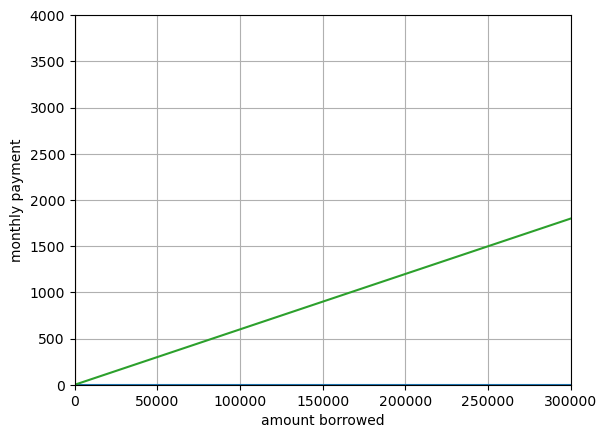

In [4]:
import matplotlib.pyplot as plt
import numpy as np

xmin = 0
xmax = 300000
ymin = 0
ymax = 4000
points = 10*xmax-xmin
x = np.linspace(xmin, xmax, points)

fix,ax = plt.subplots()
plt.axis([xmin, xmax,ymin,ymax]) # window size
plt.plot([xmin, xmax], [0, 0]) # black x axis
plt.plot([0, 0], [ymin, ymax]) # black y axis
plt.grid()
ax.set_xlabel("amount borrowed")
ax.set_ylabel("monthly payment")

# Line 1 - payment without rounding
y1 = payment(x, .06, 30)
plt.plot(x, y1)
plt.show()

Slope formula

In [5]:
r = .06
t = 30

x1 = 50000
y1 = payment(x1, r, t)
x2 = 300000
y2 = payment(x2, r, t)

slope = (y2 - y1)/(x2 - x1)
print("Slope:", slope)

Slope: 0.0059955052515275695


Mortgage rate goes up around $\$$6 for every $\$$1000 dollars borrowed